Author: Sami Mwanje, mm223kk@student.lnu.se

Understanding and implementing the KNN SciKit I used the website:

https://www.tutorialspoint.com/scikit_learn/scikit_learn_knn_learning.htm

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier

The numpy library is used to handle matrixes.

Matplotlib to plot and handle the plots of the data.

sklearn.neighbors  is used to handle the Knn and read the errors.

In [44]:
microchips = np.genfromtxt('microchips.csv', delimiter=',') # Read the microchips.csv file.
boundaryK = [1,3,5,7]  # Decision boundary with corresponding training error for k
unknownChips = np.array([[-0.3, 1.0], [-0.5, -0.1], [0.6, 0.0]]) # The unkown chips.

The needed variables are set here. 

The microchips.csv file is read using np.genfromtx.

The hyperparameter K are set here and will be [1,3,5,7].

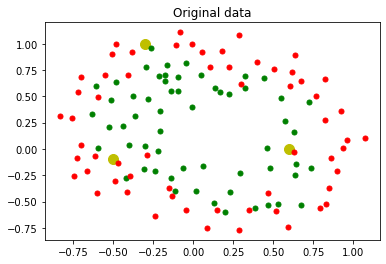

In [45]:
okChips = [] # List that will hold the ok chips.
failedChips = [] # List that will hold the failed chips.

# Sort ok and failed chips in separate lists.
for chips in microchips:
    if(chips[2] == 1):      # If chip is ok move to okChips, else move to failedChips.
        okChips.append(chips)
    else: 
        failedChips.append(chips)
           
okChips_np = np.asarray(okChips) # Convert okChips to numpy array.
failedChips_np = np.asarray(failedChips)  # Convert failedChips to numpy array.   

plt.title("Original data")      # Title of plot.
plt.plot(unknownChips[:, 0], unknownChips[:, 1], 'yo', markersize=10)   # Plot x and y's
plt.plot(okChips_np[:, 0], okChips_np[:, 1], 'go', markersize=5)        # Plot x and y's
plt.plot(failedChips_np[:, 0], failedChips_np[:, 1], 'ro', markersize=5)
plt.show()

Here ok chips and faield chips are read. 

Ok chips are sorted in a seperate array, and failed chips in another seperate array.

The seperate failed and ok chips are then ploted using plt.show after set up.

They are all ploted in the same graph.

In [46]:
# Used to get and print the result from the test set knn classification.
microchipsX = microchips[:,:2]       # Save all the microchips X-feautres data.
microchipsY = microchips[:,2:].ravel()  # Save all the microchips Y-label data, as a d array.
plt.figure(figsize=(15, 10))
for k in boundaryK:
    neigh = KNeighborsClassifier(n_neighbors=k)     # Set current K for the kNN classifier.
    neigh.fit(microchipsX,microchipsY)              # Ad training features and labels to classifier.
    print('k='+str(k)) 
    message = ''
    for x in range(len(unknownChips)):
        result = neigh.predict([unknownChips[x]])[0]    # Get result for current unkownChip.
        if (result == 1):
            message = 'OK' 
        else:
            message = 'Fail'
        print(' chip' + str((x + 1)) + ': ' + str(unknownChips[x]) + ' ==> ' + message)

k=1
 chip1: [-0.3  1. ] ==> OK
 chip2: [-0.5 -0.1] ==> Fail
 chip3: [0.6 0. ] ==> Fail
k=3
 chip1: [-0.3  1. ] ==> Fail
 chip2: [-0.5 -0.1] ==> Fail
 chip3: [0.6 0. ] ==> OK
k=5
 chip1: [-0.3  1. ] ==> Fail
 chip2: [-0.5 -0.1] ==> OK
 chip3: [0.6 0. ] ==> OK
k=7
 chip1: [-0.3  1. ] ==> Fail
 chip2: [-0.5 -0.1] ==> Fail
 chip3: [0.6 0. ] ==> OK


<Figure size 1080x720 with 0 Axes>

Each chip in the microschips data is here checked for the corresponing neighbours.

The sklearn.neighbors libarary is here used. 

The result is based on the curernt K-value [1,3,5,7]. And the K values are set using KNeighborsClassifier(n_neighbors=k).

In [47]:
#Bounderies.
h = 0.04 # The size determines the granularity of the grid.
x_min, x_max = microchips[:, 0].min()-0.1, microchips[:, 0].max()+0.1           # Get the min and max x-value. 
y_min, y_max = microchips[:, 1].min()-0.1, microchips[:, 1].max()+0.1           # Get the min and max y-value.
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))     # Mesh Grid
xy_mesh = np.c_[xx.ravel(), yy.ravel()] # Turn to Nx2 matrix

# Decision bounderies color map.
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

Setting up the decision boundry using meshgrid.

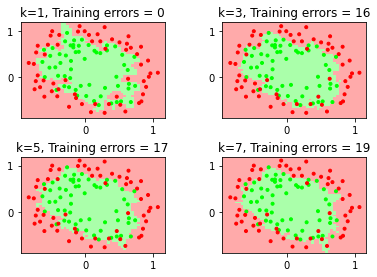

In [48]:
# Drawing the decision boundry.
figNumber = 1   # Number of figures.
for k in boundaryK:
    
    plt.subplot(2, 2, figNumber)

    neigh = KNeighborsClassifier(n_neighbors=k)     # Set current K for the kNN classifier.
    neigh.fit(microchipsX,microchipsY)              # Ad training features and labels to classifier.

    # Classify each point in the xy-mesh.
    classes = []
    for x in xy_mesh:
        result =  neigh.predict([x])[0] # Get result for current unkownChip.
        classes.append([result])
    classes_arr = np.asarray(classes)
    clz_mesh = classes_arr.reshape(xx.shape)

    # Check for errors based on given K.

    errors = 0                            # Used to count how many errors in the result.
    index = 0
    for x in microchipsX:
        class_result = neigh.predict([x])[0] # Get result for current unkownChip.
        # Check if error is found and increase error count.
        if (microchipsY[index] != class_result):
             errors += 1
        index += 1

    plt.title("k=%i, Training errors = %i" % (k, errors)) # Plot the data of the microchips.

    # Plot the bounderies and the points
    plt.pcolormesh(xx, yy, clz_mesh, cmap=cmap_light, shading='auto') # Bounderies
    plt.scatter(microchips[:, 0], microchips[:, 1], c=microchips[:, 2], marker='.', cmap=cmap_bold) # Points
    figNumber +=  1

plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9,  wspace=0.4,  hspace=0.4) # Margin between sub plots.
plt.show()  # Display subplots.

Drawing the decission boundary for failed and ok data based on their classifications using sci learn.

Checking for errors on training data using the external knn function using the sci learn libarary.

The result is printed with the plots for each K.